In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os
from google.colab import drive

# 🔗 Mount Google Drive
drive.mount('/content/drive')

# 📂 Create Output Directory
csv_output_dir = "/content/drive/MyDrive/auto_parts_models"
os.makedirs(csv_output_dir, exist_ok=True)

# ---------------------------
# 📌 Generate synthetic sales data (approx. 10,000 rows)
# ---------------------------

np.random.seed(42)

# ⏳ Dates: 34 months = ~3 years minus 2 months
months = pd.date_range(start="2022-03-01", end="2024-12-01", freq='MS')  # 34 months

# Settings
num_products = 300  # ↓ Number of products

# Categories and attributes
categories = ["Engine", "Brake", "Suspension", "Filters", "Electrical"]
brands = ["Bosch", "Denso", "ACDelco", "Valeo", "Delphi"]
car_models = ["Toyota", "Hyundai", "Ford", "Chevrolet", "Nissan"]

# 🛠 Generate products
products = []
for i in range(num_products):
    part = {
        "product_id": f"P{i+1:04}",
        "product_name": f"Part_{i+1}",
        "category": random.choice(categories),
        "brand": random.choice(brands),
        "car_model": random.choice(car_models),
        "unit_price": round(np.random.uniform(30, 800), 2)
    }
    products.append(part)

df_products = pd.DataFrame(products)

# 📈 Generate monthly sales
sales_data = []

for _, row in df_products.iterrows():
    base_demand = np.random.uniform(5, 25)

    for month in months:
        seasonal_multiplier = 1 + 0.2 * np.sin(2 * np.pi * (month.month - 1) / 12)
        units_sold = max(0, int(np.random.poisson(base_demand * seasonal_multiplier)))
        revenue = round(units_sold * row["unit_price"], 2)

        sales_data.append({
            "date": month,
            "product_id": row["product_id"],
            "product_name": row["product_name"],
            "category": row["category"],
            "brand": row["brand"],
            "car_model": row["car_model"],
            "unit_price": row["unit_price"],
            "units_sold": units_sold,
            "revenue": revenue
        })

df_sales = pd.DataFrame(sales_data)

# 💾 Save CSV
csv_path = f"{csv_output_dir}/auto_parts_sales_data.csv"
df_sales.to_csv(csv_path, index=False)

print(f"✅ CSV file saved to: {csv_path}")
print(f"✅ Total Rows Generated: {df_sales.shape[0]}")








Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ CSV file saved to: /content/drive/MyDrive/auto_parts_models/auto_parts_sales_data.csv
✅ Total Rows Generated: 10200


/tmp/ipython-input-19-3146799652.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


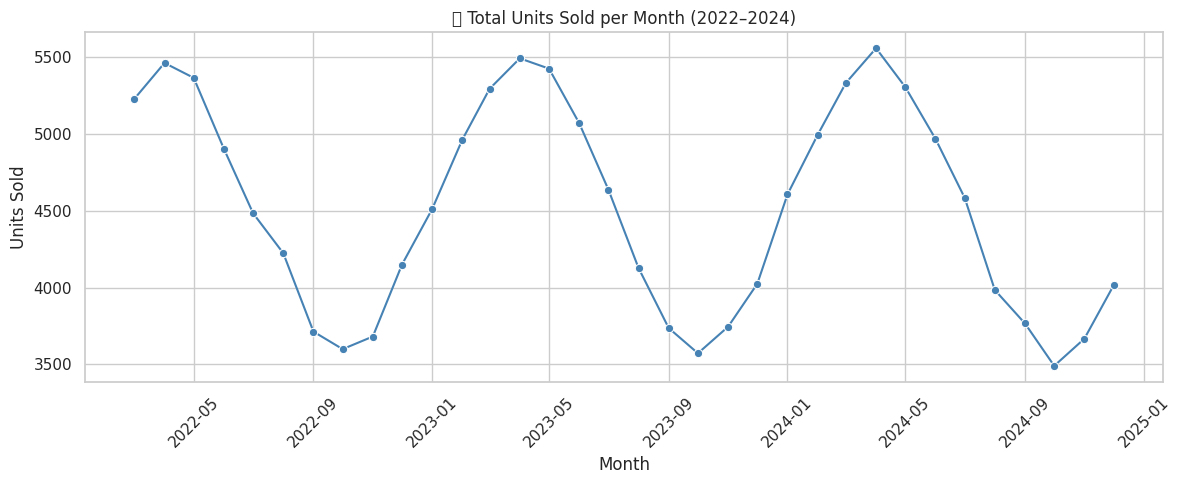

/tmp/ipython-input-19-3146799652.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette="mako")
/tmp/ipython-input-19-3146799652.py:27: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


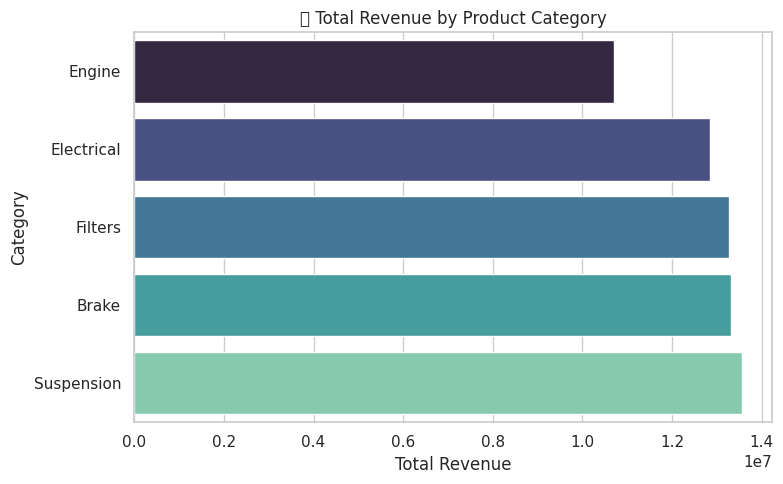

/tmp/ipython-input-19-3146799652.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_brand.values, y=avg_price_by_brand.index, palette="rocket")
/tmp/ipython-input-19-3146799652.py:38: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


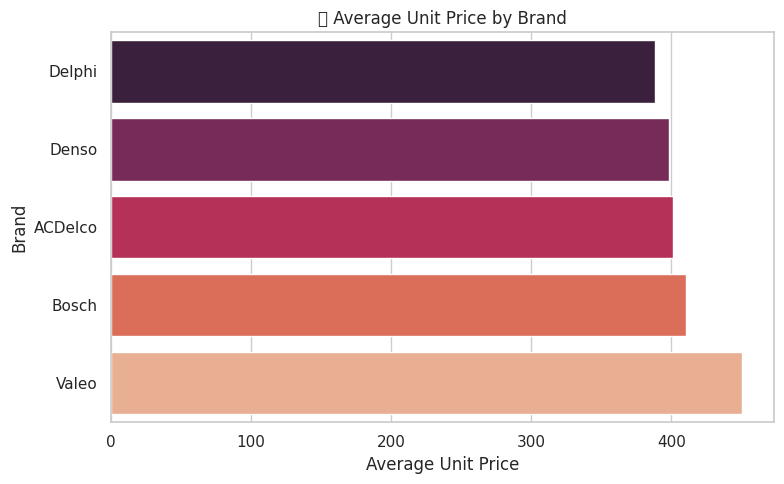

/tmp/ipython-input-19-3146799652.py:47: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


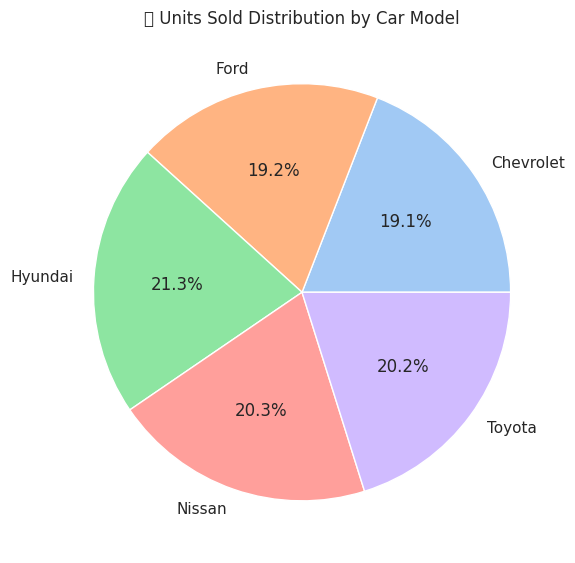

/tmp/ipython-input-19-3146799652.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue.values, y=top_revenue.index, palette="viridis")
/tmp/ipython-input-19-3146799652.py:58: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


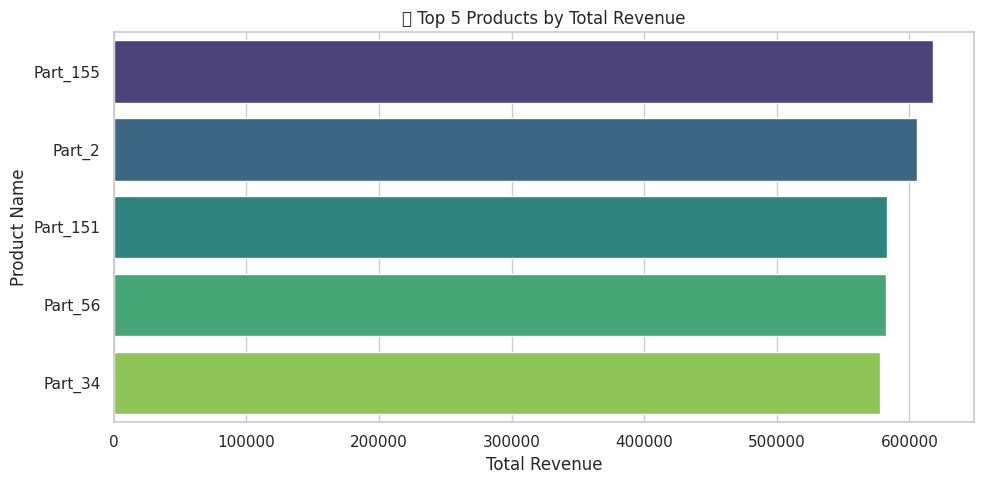

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for consistency
sns.set(style="whitegrid")

# 1️⃣ Total Units Sold per Month (Time Series)
monthly_sales = df_sales.groupby("date")["units_sold"].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x="date", y="units_sold", marker="o", color="steelblue")
plt.title("📈 Total Units Sold per Month (2022–2024)")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ Revenue by Product Category
revenue_by_category = df_sales.groupby("category")["revenue"].sum().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_category.values, y=revenue_by_category.index, palette="mako")
plt.title("💰 Total Revenue by Product Category")
plt.xlabel("Total Revenue")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# 3️⃣ Average Unit Price by Brand
avg_price_by_brand = df_sales.groupby("brand")["unit_price"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_brand.values, y=avg_price_by_brand.index, palette="rocket")
plt.title("🏷️ Average Unit Price by Brand")
plt.xlabel("Average Unit Price")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

# 4️⃣ Units Sold Distribution by Car Model
units_by_model = df_sales.groupby("car_model")["units_sold"].sum()

plt.figure(figsize=(6, 6))
plt.pie(units_by_model, labels=units_by_model.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("🚗 Units Sold Distribution by Car Model")
plt.tight_layout()
plt.show()

# 5️⃣ Top 5 Products by Total Revenue
top_revenue = df_sales.groupby("product_name")["revenue"].sum().nlargest(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_revenue.values, y=top_revenue.index, palette="viridis")
plt.title("🏆 Top 5 Products by Total Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()




In [ ]:
print("📌 Visualization Summary")

print("""
1. Monthly Sales Trend:
   - The line chart visualizes total units sold per month.
   - Helps detect seasonality and plan inventory accordingly.

2. Revenue by Category:
   - Bar chart displays total revenue across product categories.
   - Useful for identifying high-performing segments and reallocating marketing or purchasing budgets.

3. Average Unit Price by Brand:
   - Highlights pricing variation between different suppliers.
   - Supports pricing strategy and procurement decisions.

4. Sales Distribution by Car Model:
   - Pie chart provides an overview of units sold by car brand.
   - Helps guide targeted campaigns or partnerships.

5. Top Revenue-Generating Products:
   - Identifies the top 5 products contributing most to overall revenue.
   - Critical for stock prioritization and promotional planning.
""")


📌 Visualization Summary

1. Monthly Sales Trend:
   - The line chart visualizes total units sold per month.
   - Helps detect seasonality and plan inventory accordingly.

2. Revenue by Category:
   - Bar chart displays total revenue across product categories.
   - Useful for identifying high-performing segments and reallocating marketing or purchasing budgets.

3. Average Unit Price by Brand:
   - Highlights pricing variation between different suppliers.
   - Supports pricing strategy and procurement decisions.

4. Sales Distribution by Car Model:
   - Pie chart provides an overview of units sold by car brand.
   - Helps guide targeted campaigns or partnerships.

5. Top Revenue-Generating Products:
   - Identifies the top 5 products contributing most to overall revenue.
   - Critical for stock prioritization and promotional planning.



In [ ]:
# ---------------------------
# 📋 Summary Report
# ---------------------------

summary = {
    "Total Products": df_sales["product_id"].nunique(),
    "Unique Brands": df_sales["brand"].nunique(),
    "Unique Car Models": df_sales["car_model"].nunique(),
    "Total Units Sold": int(df_sales["units_sold"].sum()),
    "Total Revenue (SAR)": f"{df_sales['revenue'].sum():,.2f}"
}

print("\n📊 Dataset Overview:")
print("-" * 30)
for key, value in summary.items():
    print(f"{key:<25}: {value}")

# Units sold by category
category_sales = df_sales.groupby("category")["units_sold"].sum().sort_values(ascending=False)

print("\n📂 Units Sold by Product Category:")
print("-" * 40)
for category, units in category_sales.items():
    print(f"{category:<20}: {units:,}")



📊 Dataset Overview:
------------------------------
Total Products           : 300
Unique Brands            : 5
Unique Car Models        : 5
Total Units Sold         : 153726
Total Revenue (SAR)      : 63,685,370.25

📂 Units Sold by Product Category:
----------------------------------------
Suspension          : 33,777
Brake               : 32,711
Electrical          : 30,259
Engine              : 28,782
Filters             : 28,197


In [ ]:
from google.colab import files
files.download(csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/auto_parts_models/auto_parts_sales_data.csv"
df = pd.read_csv(file_path)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown
import os
from datetime import datetime

# Define the path to the CSV file in Google Drive
file_path = "/content/drive/MyDrive/auto_parts_models/auto_parts_sales_data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Continue with further data processing and analysis...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.head())
print(df.columns)


        date product_id product_name category  brand car_model  unit_price  \
0 2022-03-01      P0001       Part_1   Engine  Denso    Nissan       318.4   
1 2022-04-01      P0001       Part_1   Engine  Denso    Nissan       318.4   
2 2022-05-01      P0001       Part_1   Engine  Denso    Nissan       318.4   
3 2022-06-01      P0001       Part_1   Engine  Denso    Nissan       318.4   
4 2022-07-01      P0001       Part_1   Engine  Denso    Nissan       318.4   

   units_sold  revenue  week  month  year  
0          10   3184.0     9      3  2022  
1           6   1910.4    13      4  2022  
2          10   3184.0    17      5  2022  
3           3    955.2    22      6  2022  
4           1    318.4    26      7  2022  
Index(['date', 'product_id', 'product_name', 'category', 'brand', 'car_model',
       'unit_price', 'units_sold', 'revenue', 'week', 'month', 'year'],
      dtype='object')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-29-1674035200.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='product_name', y='total_units_sold', data=top_10_units, palette="Blues_d")


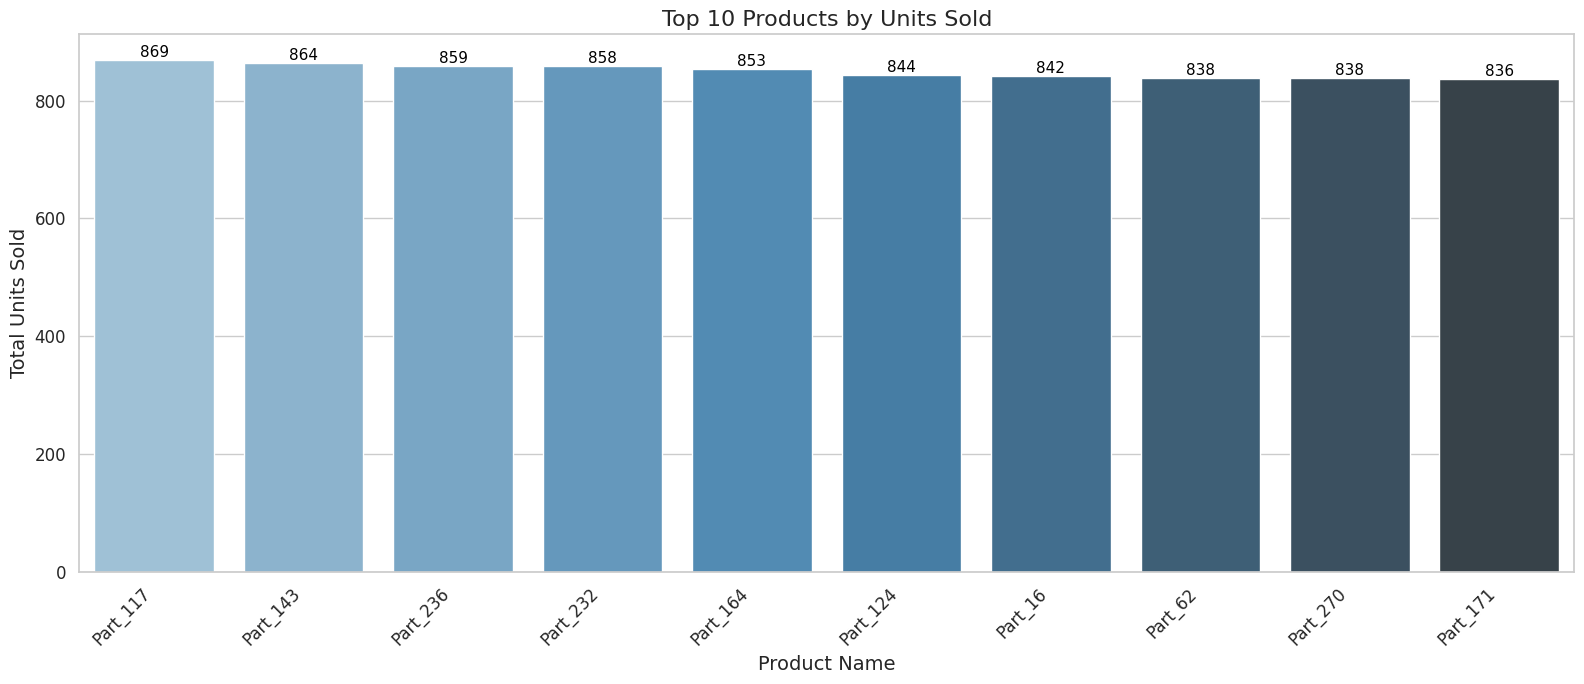

/tmp/ipython-input-29-1674035200.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='product_name', y='total_revenue', data=top_10_revenue, palette="Greens_d")


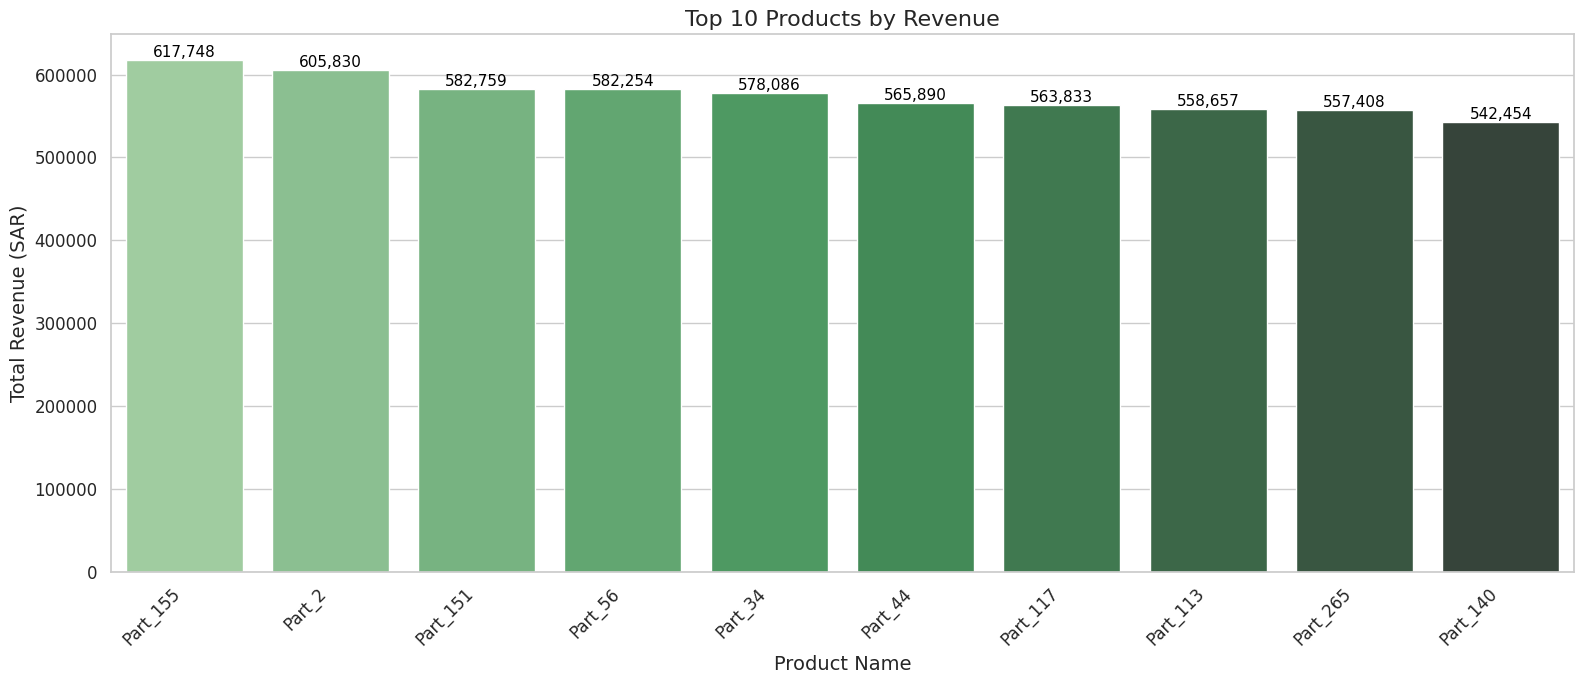

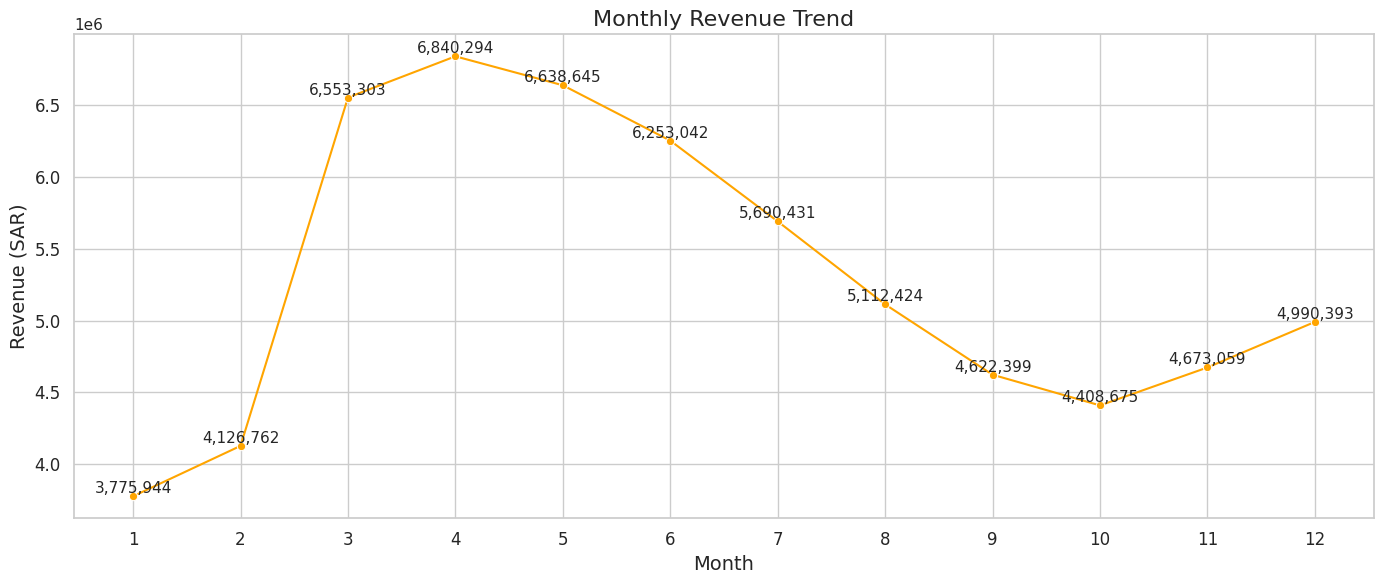

/tmp/ipython-input-29-1674035200.py:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='revenue', palette="pastel")


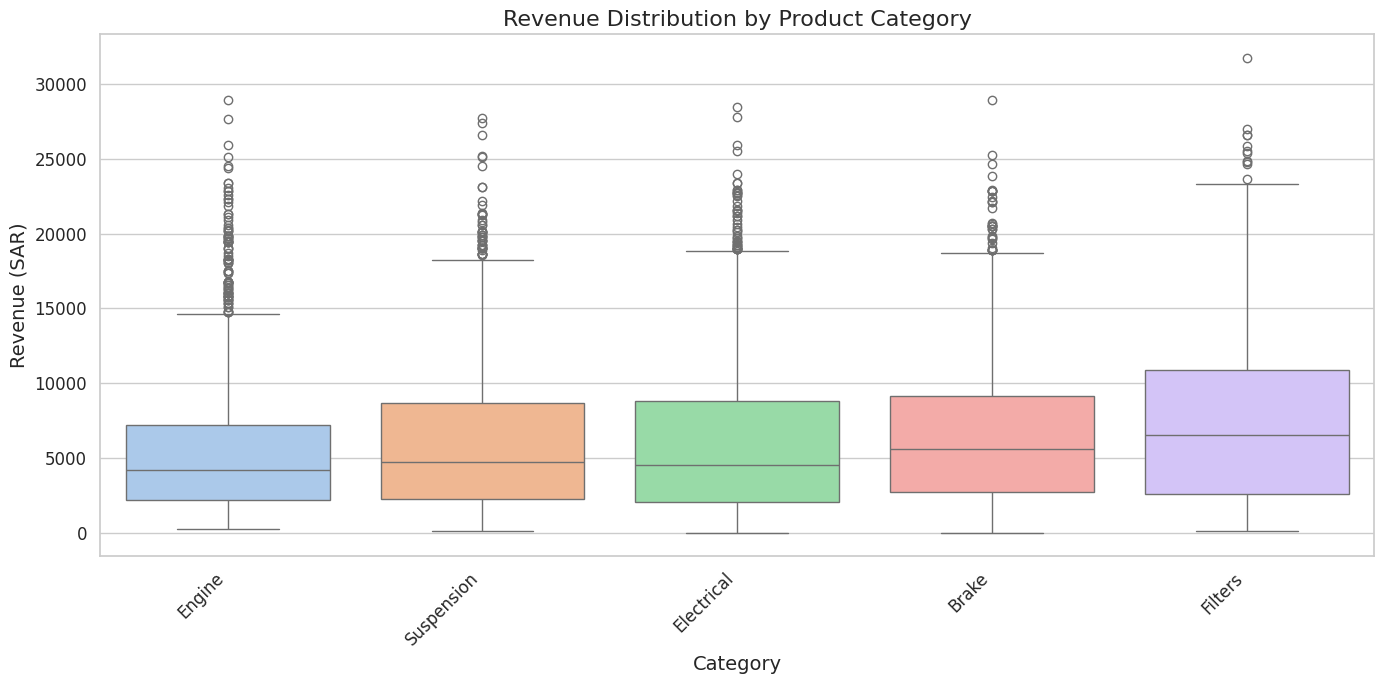

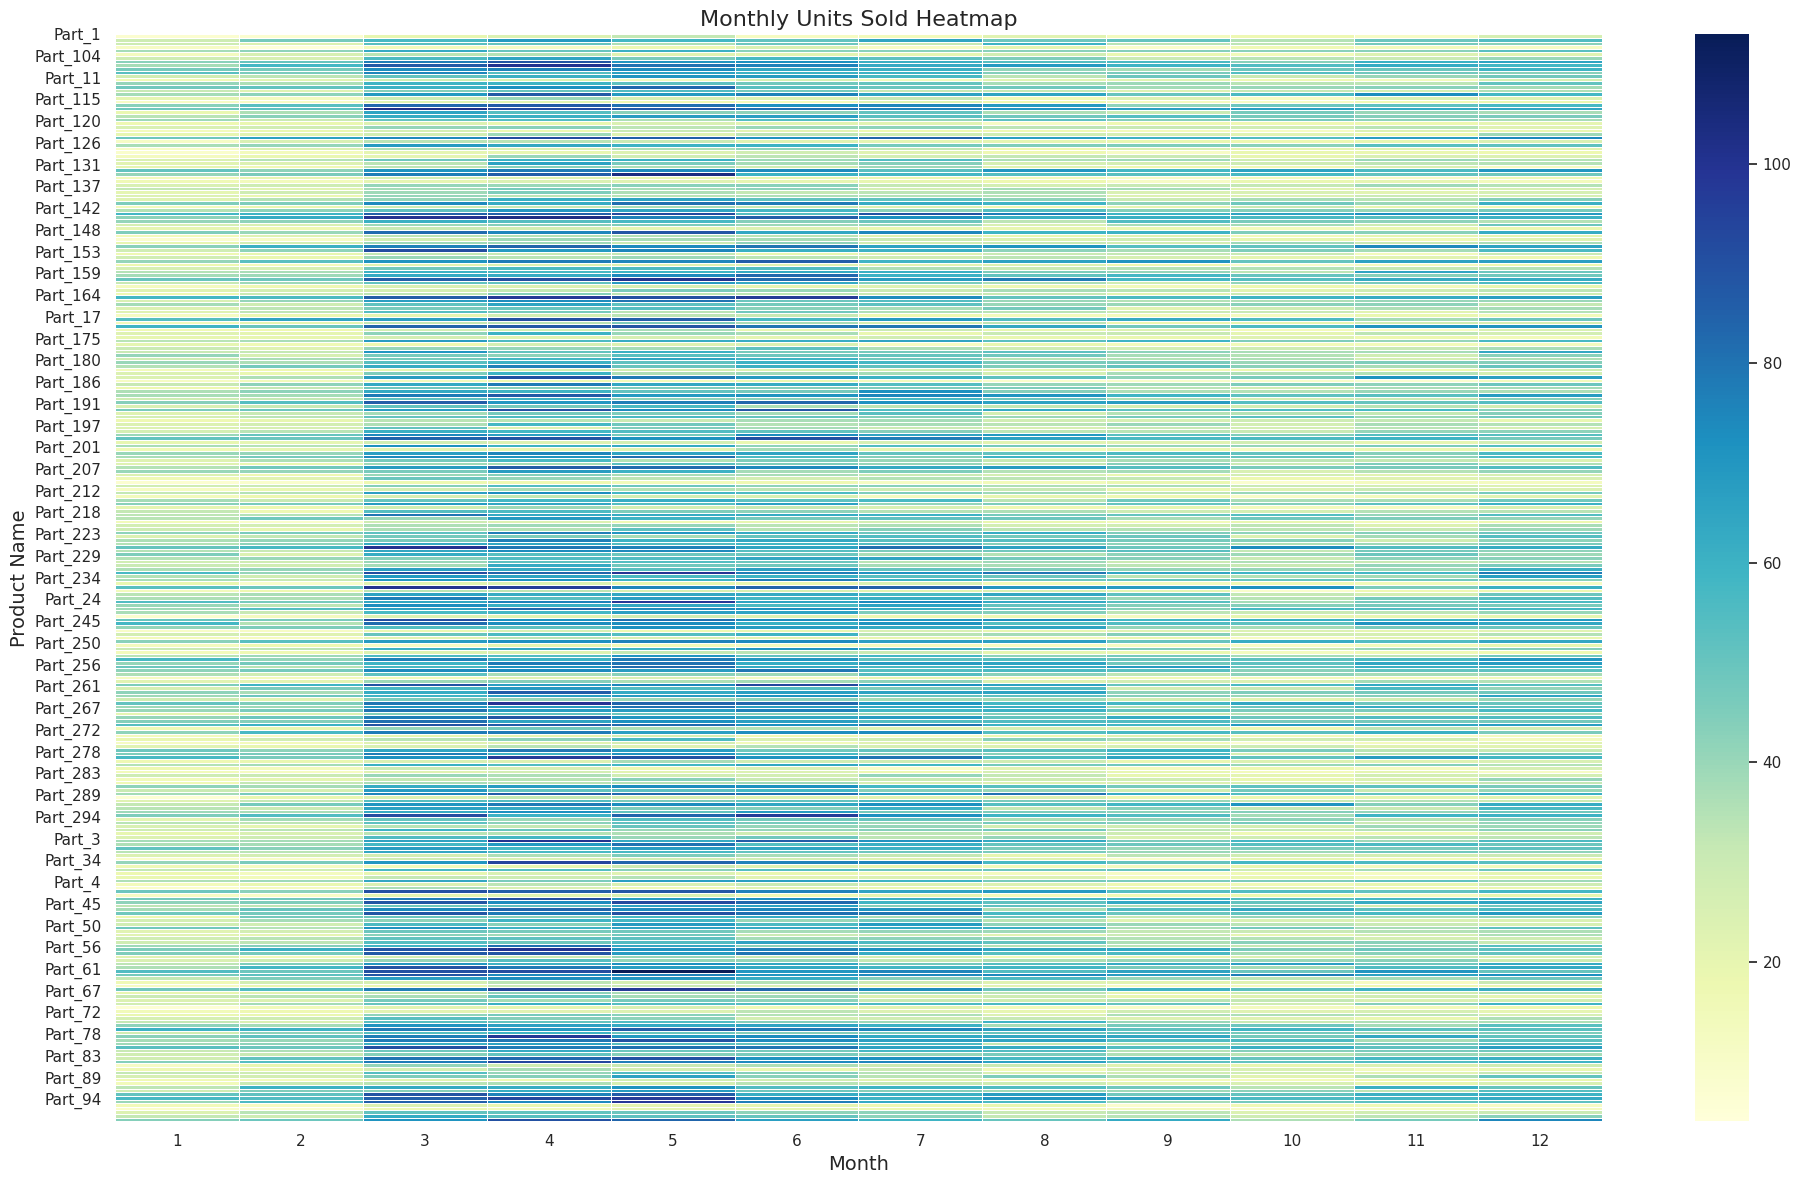


## 📊 Auto Parts Sales Summary Report

- **Total Products Analyzed**: 300
- **Time Period**: 1 year
- **Top Product by Units Sold**: Part_117
- **Top Product by Revenue**: Part_155
- **Total Units Sold (Top Product)**: 869
- **Estimated Monthly Funding (Top Product)**: 46715.76 SAR

### 📁 Exported Files
- `product_yearly_summary.csv`: Full product performance summary
- All charts and this summary are viewable in the notebook

---

> ✅ Use this analysis to guide purchasing decisions, allocate budget effectively, and prioritize product inventory planning.


In [ ]:
# ----------------------------------------
# 📌 Auto Parts Sales Analysis Script
# ----------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown
import os
from google.colab import drive
from datetime import datetime

# Mount Google Drive
drive.mount('/content/drive')

# Create output directory
output_dir = "/content/drive/MyDrive/auto_parts_models"
os.makedirs(output_dir, exist_ok=True)

# Prepare time columns
df['date'] = pd.to_datetime(df['date'])
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Yearly summary per product
yearly_summary = df.groupby('product_name').agg(
    total_units_sold=('units_sold', 'sum'),
    total_revenue=('revenue', 'sum'),
    avg_monthly_units=('units_sold', lambda x: round(x.sum() / 12)),
    avg_monthly_revenue=('revenue', lambda x: round(x.sum() / 12)),
    unit_price=('unit_price', 'mean')
).reset_index()

yearly_summary['monthly_funding'] = yearly_summary['avg_monthly_units'] * yearly_summary['unit_price']

top_10_units = yearly_summary.sort_values('total_units_sold', ascending=False).head(10)
top_10_revenue = yearly_summary.sort_values('total_revenue', ascending=False).head(10)

csv_path_drive = os.path.join(output_dir, "product_yearly_summary.csv")
csv_path_local = "/content/product_yearly_summary.csv"
yearly_summary.to_csv(csv_path_drive, index=False)
yearly_summary.to_csv(csv_path_local, index=False)

from google.colab import files
files.download(csv_path_local)

# Plot 1: Top 10 Products by Units Sold with annotations
plt.figure(figsize=(16, 7))
ax = sns.barplot(x='product_name', y='total_units_sold', data=top_10_units, palette="Blues_d")
plt.title("Top 10 Products by Units Sold", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Product Name", fontsize=14)
plt.ylabel("Total Units Sold", fontsize=14)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11, color='black')

plt.show()

# Plot 2: Top 10 Products by Revenue with annotations
plt.figure(figsize=(16, 7))
ax = sns.barplot(x='product_name', y='total_revenue', data=top_10_revenue, palette="Greens_d")
plt.title("Top 10 Products by Revenue", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Product Name", fontsize=14)
plt.ylabel("Total Revenue (SAR)", fontsize=14)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=11, color='black')

plt.show()

# Plot 3: Monthly Revenue Trend with data labels
monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()

plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=monthly_revenue, x='month', y='revenue', marker='o', color='orange')
plt.title("Monthly Revenue Trend", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Revenue (SAR)", fontsize=14)
plt.grid(True)
plt.xticks(monthly_revenue['month'], labels=[str(m) for m in monthly_revenue['month']], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

for x, y in zip(monthly_revenue['month'], monthly_revenue['revenue']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=11)

plt.show()

# Plot 4: Revenue Distribution by Product Category
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='category', y='revenue', palette="pastel")
plt.title("Revenue Distribution by Product Category", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Revenue (SAR)", fontsize=14)
plt.tight_layout()
plt.show()

# Plot 5: Heatmap of Monthly Units Sold by Product WITHOUT annotations for clarity
pivot_heatmap = df.pivot_table(
    values='units_sold',
    index='product_name',
    columns='month',
    aggfunc='sum'
).fillna(0)

plt.figure(figsize=(20, 12))
sns.heatmap(pivot_heatmap, cmap='YlGnBu', linewidths=0.5, annot=False)  # annotations disabled
plt.title("Monthly Units Sold Heatmap", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Product Name", fontsize=14)
plt.tight_layout()
plt.show()

# Markdown summary report
report_md = f"""
## 📊 Auto Parts Sales Summary Report

- **Total Products Analyzed**: {yearly_summary.shape[0]}
- **Time Period**: 1 year
- **Top Product by Units Sold**: {top_10_units.iloc[0]['product_name']}
- **Top Product by Revenue**: {top_10_revenue.iloc[0]['product_name']}
- **Total Units Sold (Top Product)**: {top_10_units.iloc[0]['total_units_sold']:,}
- **Estimated Monthly Funding (Top Product)**: {top_10_units.iloc[0]['monthly_funding']:.2f} SAR

### 📁 Exported Files
- `product_yearly_summary.csv`: Full product performance summary
- All charts and this summary are viewable in the notebook

---

> ✅ Use this analysis to guide purchasing decisions, allocate budget effectively, and prioritize product inventory planning.
"""

display(Markdown(report_md))
